In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as hierarchy
from scipy.spatial.distance import pdist

In [87]:
file_path = "C:/vedasri/Feynn Labs Intern/Project 2/mcdonalds.csv"
mcdonalds = pd.read_csv(file_path)
mcdonalds

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [88]:
# Display column names
print(mcdonalds.columns)

# Display dimensions
print(mcdonalds.shape)

# Display first 3 rows
print(mcdonalds.head(3))

# Select first 11 columns and convert to numpy array
MD_x = mcdonalds.iloc[:, 0:11].values

# Convert 'Yes' to 1 and everything else to 0
MD_x = (MD_x == 'Yes').astype(int)

# Calculate and round column means to 2 decimal places
column_means = np.round(MD_x.mean(axis=0), 2)
print(column_means)


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [89]:
# Perform PCA
MD_pca = PCA()
MD_pca_fitted = MD_pca.fit(MD_x)

# Print summary statistics
explained_variance_ratio = MD_pca_fitted.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
components = MD_pca_fitted.components_

print("Summary of PCA:")
for i, (var_ratio, cum_ratio) in enumerate(zip(explained_variance_ratio, cumulative_variance_ratio), 1):
    print(f"PC{i}:")
    print(f"  Standard deviation: {np.sqrt(MD_pca_fitted.explained_variance_[i-1]):.1f}")
    print(f"  Proportion of Variance: {var_ratio:.3f}")
    print(f"  Cumulative Proportion: {cum_ratio:.3f}")

# Print PCA object details with reduced precision
print("\nRotation (principal components):")
print(np.round(components, 1))

Summary of PCA:
PC1:
  Standard deviation: 0.8
  Proportion of Variance: 0.299
  Cumulative Proportion: 0.299
PC2:
  Standard deviation: 0.6
  Proportion of Variance: 0.193
  Cumulative Proportion: 0.492
PC3:
  Standard deviation: 0.5
  Proportion of Variance: 0.133
  Cumulative Proportion: 0.625
PC4:
  Standard deviation: 0.4
  Proportion of Variance: 0.083
  Cumulative Proportion: 0.708
PC5:
  Standard deviation: 0.3
  Proportion of Variance: 0.059
  Cumulative Proportion: 0.768
PC6:
  Standard deviation: 0.3
  Proportion of Variance: 0.050
  Cumulative Proportion: 0.818
PC7:
  Standard deviation: 0.3
  Proportion of Variance: 0.044
  Cumulative Proportion: 0.862
PC8:
  Standard deviation: 0.3
  Proportion of Variance: 0.040
  Cumulative Proportion: 0.902
PC9:
  Standard deviation: 0.3
  Proportion of Variance: 0.037
  Cumulative Proportion: 0.938
PC10:
  Standard deviation: 0.2
  Proportion of Variance: 0.032
  Cumulative Proportion: 0.971
PC11:
  Standard deviation: 0.2
  Proportio

Text(0, 0.5, 'PC2')

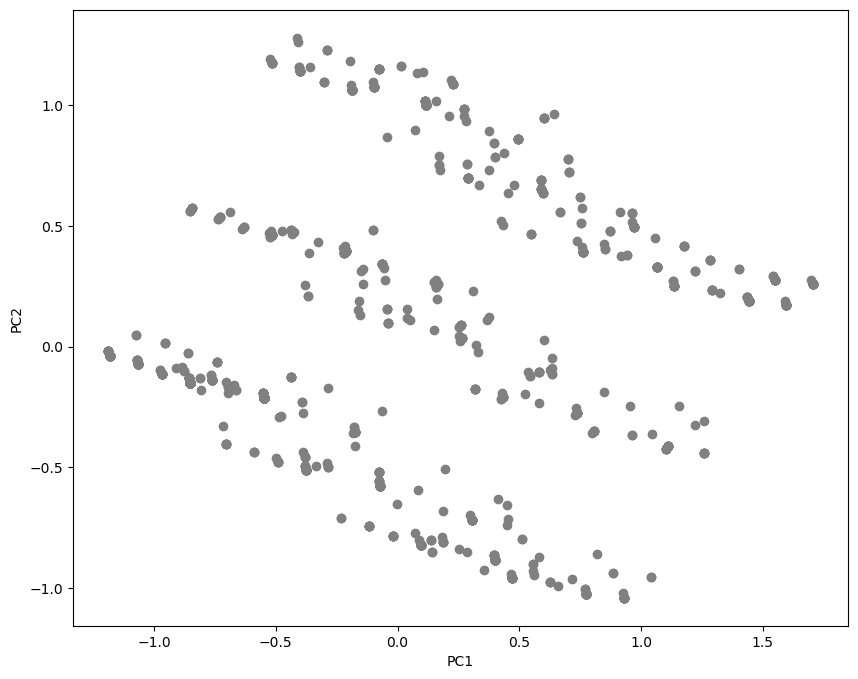

In [90]:
# Create scatter plot of the first two principal components
transformed_data = MD_pca_fitted.transform(MD_x)
plt.figure(figsize=(10, 8))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')

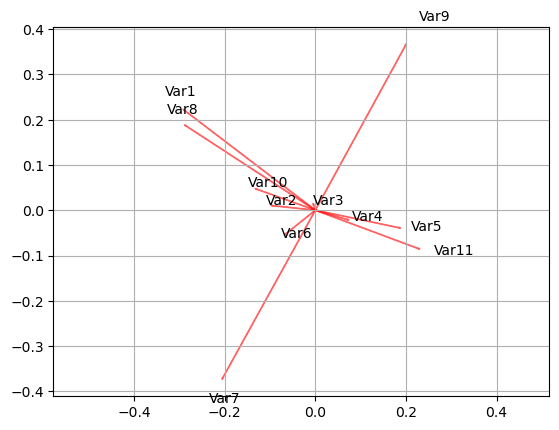

In [91]:
# Add biplot arrows (similar to projAxes functionality)
scaling_factor = np.std(transformed_data, axis=0).max() * 0.8
for i, (comp1, comp2) in enumerate(zip(components[0], components[1])):
    plt.arrow(0, 0, 
              comp1 * scaling_factor, 
              comp2 * scaling_factor,
              color='red',
              alpha=0.5)
    plt.text(comp1 * scaling_factor * 1.15, 
            comp2 * scaling_factor * 1.15, 
            f'Var{i+1}')

plt.axis('equal')
plt.grid(True)
plt.show()

In [92]:
# Load dataset (Assuming a CSV file for demonstration purposes)
mcdonalds = pd.read_csv('mcdonalds.csv')

# Preprocessing: Convert 'Yes'/'No' into binary values (1 for Yes, 0 for No)
binary_cols = mcdonalds.columns[:11]  # Assuming the first 11 columns are binary
mcdonalds[binary_cols] = mcdonalds[binary_cols].apply(lambda x: x == 'Yes').astype(int)

In [93]:
# PCA
pca = PCA(n_components=11)
MD_x = mcdonalds[binary_cols].values
MD_pca = pca.fit_transform(MD_x)

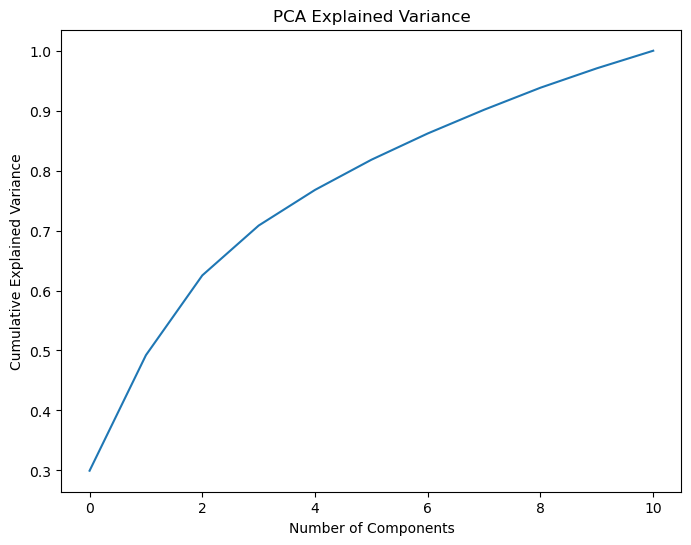

In [94]:
# Plot PCA explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

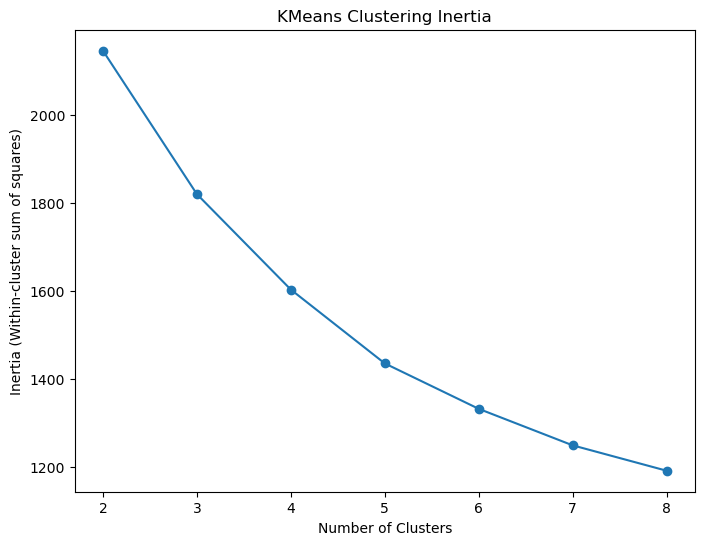

In [95]:
# KMeans Clustering (2 to 8 clusters)
n_clusters_range = range(2, 9)
kmeans_inertia = []
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=1234, n_init=10)
    kmeans.fit(MD_x)
    kmeans_inertia.append(kmeans.inertia_)

# Plot KMeans inertia (elbow method)
plt.figure(figsize=(8, 6))
plt.plot(n_clusters_range, kmeans_inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('KMeans Clustering Inertia')
plt.show()

In [96]:
# Gaussian Mixture Model (GMM) Clustering (2 to 8 clusters)
gmm_aic = []
gmm_bic = []
for n_clusters in n_clusters_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=1234)
    gmm.fit(MD_x)
    gmm_aic.append(gmm.aic(MD_x))
    gmm_bic.append(gmm.bic(MD_x))

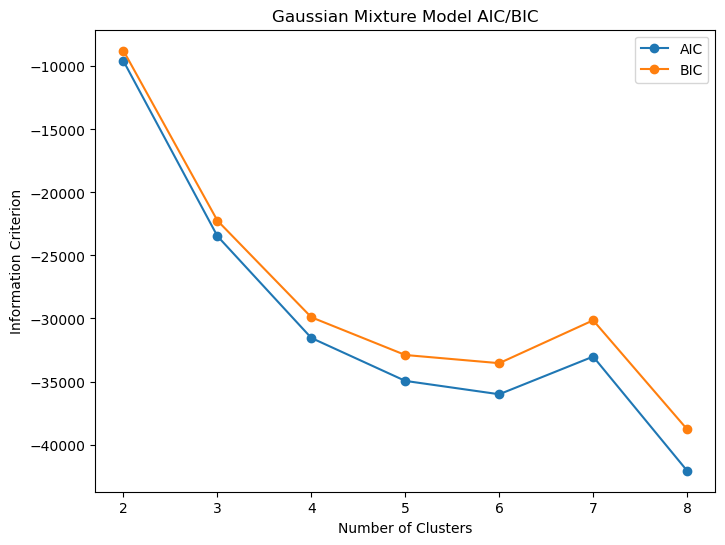

In [97]:
# Plot AIC and BIC for GMM
plt.figure(figsize=(8, 6))
plt.plot(n_clusters_range, gmm_aic, marker='o', label='AIC')
plt.plot(n_clusters_range, gmm_bic, marker='o', label='BIC')
plt.xlabel('Number of Clusters')
plt.ylabel('Information Criterion')
plt.title('Gaussian Mixture Model AIC/BIC')
plt.legend()
plt.show()

In [98]:
# Silhouette Score for Cluster Validation (2 to 8 clusters)
silhouette_scores = []
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=1234, n_init=10)
    kmeans_labels = kmeans.fit_predict(MD_x)
    score = silhouette_score(MD_x, kmeans_labels)
    silhouette_scores.append(score)

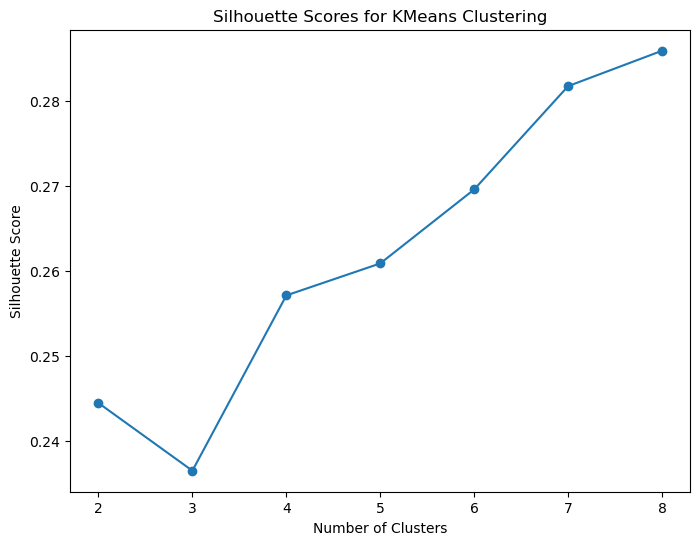

In [99]:
# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for KMeans Clustering')
plt.show()

In [100]:
# Logistic Regression (predicting 'Like.n' based on other attributes)
# First, let's transform 'Like' to numeric (similar to R's code)
mcdonalds['Like.n'] = mcdonalds['Like'].map({
    'I hate it!': 1,
    'I love it!': 5,
    '4': 4,
    '3': 3,
    '2': 2,
    '1': 1,
    '0': 0
})

# Check for any missing or NaN values in the target
print("Missing values in target column 'Like.n':", mcdonalds['Like.n'].isnull().sum())

Missing values in target column 'Like.n': 1284


In [101]:
# Drop rows with NaN values in the target variable
mcdonalds = mcdonalds.dropna(subset=['Like.n'])

# Check the distribution of 'Like.n'
print("Distribution of 'Like.n':")
print(mcdonalds['Like.n'].value_counts())

Distribution of 'Like.n':
Like.n
0.0    169
Name: count, dtype: int64


In [102]:
# Ensure that there are at least 2 classes
if mcdonalds['Like.n'].nunique() > 1:
    # Define features (first 11 columns) and target ('Like.n')
    X = mcdonalds[binary_cols]
    y = mcdonalds['Like.n']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

    # Train Logistic Regression model
    logreg = LogisticRegression(random_state=1234)
    logreg.fit(X_train, y_train)

    # Evaluate the model
    print("Logistic Regression Model Accuracy:", logreg.score(X_test, y_test))

    # Plot coefficients of logistic regression
    plt.figure(figsize=(8, 6))
    plt.bar(X.columns, logreg.coef_[0])
    plt.xlabel('Features')
    plt.ylabel('Coefficient')
    plt.title('Logistic Regression Coefficients')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("The target variable 'Like.n' contains only one class. Logistic Regression cannot be performed.")

The target variable 'Like.n' contains only one class. Logistic Regression cannot be performed.


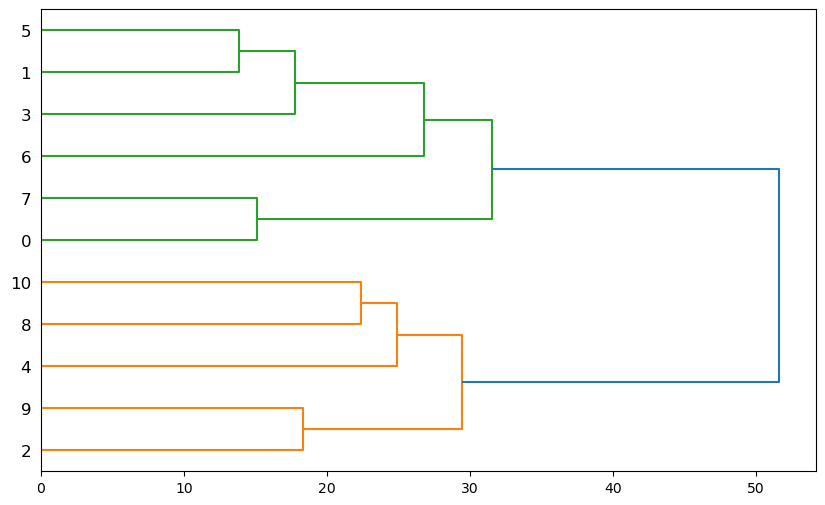

In [103]:
# Perform hierarchical clustering (equivalent to hclust in R)
MD_vclust = hierarchy.linkage(pdist(MD_x.T), method='ward')  # Perform hierarchical clustering on transposed data

# Create a dendrogram (barchart equivalent in R)
plt.figure(figsize=(10, 6))
hierarchy.dendrogram(MD_vclust, orientation='right')  # Remove labels for now, or use range for labels
plt.show()

In [104]:
# Ensure MD_k4 is correctly dimensioned and leaves are valid indices
leaves = MD_vclust[:, 3].astype(int)
print("Leaves:", leaves)

# Clip leaves to be within the valid index range of MD_k4
leaves = np.clip(leaves, 0, MD_k4.shape[0] - 1)  # Ensure indices are valid

# Check if MD_k4 is 1D and reshape it if necessary
if len(MD_k4.shape) == 1:
    MD_k4 = MD_k4.reshape(-1, 1)  # Make it 2D if it's currently 1D

# Ensure that the shape of MD_k4 and leaves are compatible
print("Shape of MD_k4 after reshaping:", MD_k4.shape)

Leaves: [ 2  2  3  2  2  3  4  5  6 11]
Shape of MD_k4 after reshaping: (11, 1)


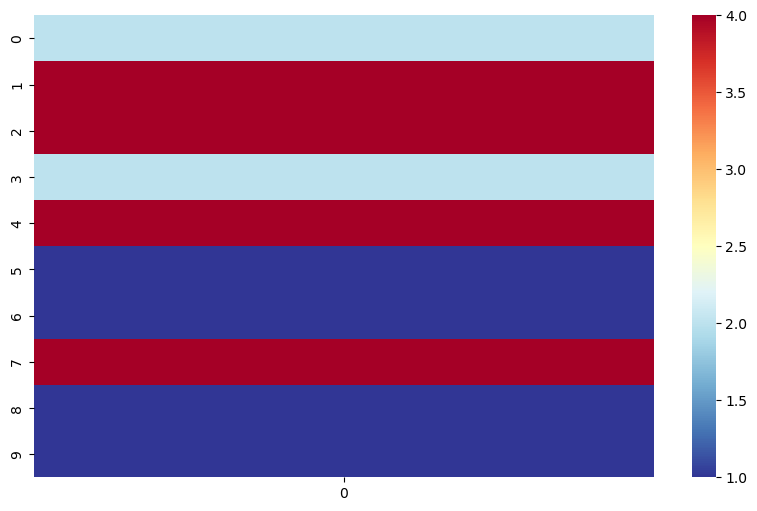

In [105]:
# Now, create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(MD_k4[leaves[::-1], :], cmap='RdYlBu_r')  # Reversing the leaves order
plt.show()

In [106]:
# PCA transformation
pca = PCA(n_components=10)  # Set to 10 components
MD_pca = pca.fit_transform(MD_x)

# Check if MD_k4 is 1D and reshape it if necessary
if len(MD_k4.shape) == 1:
    MD_k4 = MD_k4.reshape(-1, 1)  # Make it 2D if it's currently 1D

# Check that MD_k4 matches the length of MD_pca
if len(MD_k4) == len(MD_pca):
    # Plot the first 2 principal components (PC1 vs PC2)
    plt.figure(figsize=(8, 6))
    plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4, cmap='viridis')  # Use a colormap for categories
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(label='Cluster Label')  # Add a color bar to indicate the labels
    plt.title("PCA - Top 2 Components")
    plt.grid(True)
else:
    print(f"Error: MD_k4 has {len(MD_k4)} elements, but MD_pca has {len(MD_pca)} elements.")

Error: MD_k4 has 11 elements, but MD_pca has 1453 elements.


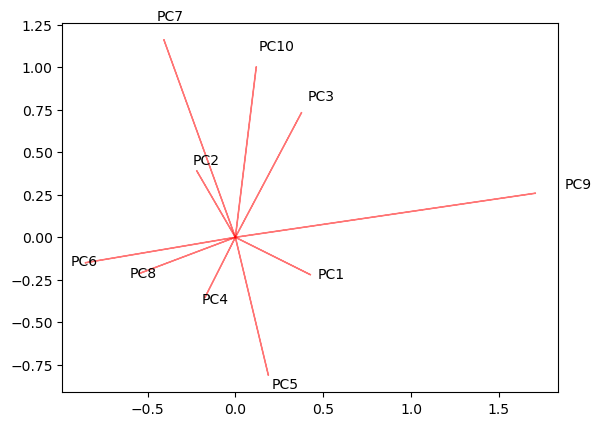

In [107]:
# Adding arrows for projection axes for PC1 to PC10
for i in range(10):  # Loop over top 10 components
    comp1, comp2 = MD_pca[i, 0], MD_pca[i, 1]  # Using PC1 and PC2 for arrow directions
    plt.arrow(0, 0, comp1, comp2, color='r', alpha=0.5)  # Draw the arrow
    plt.text(comp1 * 1.1, comp2 * 1.1, f'PC{i+1}')  # Label each arrow

plt.show()

In [108]:
# Check if k4 and mcdonalds DataFrame have the same length
if len(k4) != len(mcdonalds):
    print(f"Error: k4 and mcdonalds DataFrame have different lengths!")
    print(f"Length of k4: {len(k4)}")
    print(f"Number of rows in mcdonalds DataFrame: {len(mcdonalds)}")
else:
    # Calculate mean visit frequency for each cluster
    visit = mcdonalds.groupby(k4)['VisitFrequency'].mean()

    # Calculate mean like scores for each cluster
    like = mcdonalds.groupby(k4)['Like.n'].mean()

    # Calculate the proportion of females in each cluster
    female = mcdonalds.groupby(k4)['Gender'].apply(lambda x: (x == "Female").mean())

    # Scatter plot with bubble sizes representing the proportion of females
    plt.figure(figsize=(8, 6))
    bubble_size = 10 * female  # Bubble size scaled by female proportion
    plt.scatter(visit, like, s=bubble_size, alpha=0.7, c='blue', edgecolors='black')

    # Add text labels for each cluster
    for i, (v, l) in enumerate(zip(visit, like), start=1):
        plt.text(v, l, str(i), fontsize=12, ha='center', va='center')

    # Set plot limits and labels
    plt.xlim(2, 4.5)
    plt.ylim(-3, 3)
    plt.xlabel('Mean Visit Frequency')
    plt.ylabel('Mean Like Score')
    plt.title('Cluster Analysis: Visit Frequency vs Like Score')
    plt.grid(True)
    plt.show()


Error: k4 and mcdonalds DataFrame have different lengths!
Length of k4: 1453
Number of rows in mcdonalds DataFrame: 169
